In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import explore as ex

In [2]:
df=pd.read_csv('Customer-Churn-Records.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
#checking for nulls in the dataset
for c in df:
    print(c)
    print(df[c].isna().sum())

RowNumber
0
CustomerId
0
Surname
0
CreditScore
0
Geography
0
Gender
0
Age
0
Tenure
0
Balance
0
NumOfProducts
0
HasCrCard
0
IsActiveMember
0
EstimatedSalary
0
Exited
0
Complain
0
Satisfaction Score
0
Card Type
0
Point Earned
0


In [5]:
#rename the features so they are easier to deal with and drop the row number feature. it is irrelivant.
df.drop(columns='RowNumber', inplace=True)
df.rename(columns={'CustomerId': 'customer_id', 'Surname': 'surname', 'CreditScore': 'credit_score',
                   'Geography': 'geography', 'Gender': 'gender',
                   'Age': 'age', 'Tenure': 'tenure', 'Balance': 'balance',
                   'NumOfProducts': 'num_products', 'HasCrCard': 'has_cr_card',
                   'IsActiveMember': 'is_active_member',
                   'EstimatedSalary': 'estimated_salary', 'Exited': 'churn',
                   'Complain': 'complain', 'Satisfaction Score': 'satisfaction_score',
                   'Card Type': 'card_type', 'Point Earned': 'point_earned'}, inplace=True)

In [6]:
df.head()

,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_products,has_cr_card,is_active_member,estimated_salary,churn,complain,satisfaction_score,card_type,point_earned
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## There is not much preperation for this data set so we will get into exploration

In [7]:
#split into train, val and test. stratify on churn because it's our target
train, val, test= ex.tts(df, 'churn')

In [8]:
train.head()

,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_products,has_cr_card,is_active_member,estimated_salary,churn,complain,satisfaction_score,card_type,point_earned
7142,15654859,Ngozichukwuka,612,Spain,Female,63,2,131629.17,2,1,0,122109.58,1,1,4,SILVER,642
6725,15639552,Mellor,603,Germany,Female,40,8,148897.02,1,0,0,105052.90,0,0,1,DIAMOND,352
8129,15729246,Hardacre,847,Spain,Male,31,5,0.00,2,1,1,76326.67,0,0,4,SILVER,791
5338,15784000,Pope,715,Germany,Female,34,9,102277.52,1,0,0,177852.57,1,1,2,SILVER,338
9866,15632446,Allan,667,France,Male,24,4,0.00,2,0,0,180329.83,0,0,3,SILVER,392


In [9]:
train.shape, val.shape, test.shape

((7200, 17), (1800, 17), (1000, 17))

In [10]:
#I want to start by looking at points earned and credit score

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 1:</h2>
    </header>
    <dl>
        <dt>Are customers with less points earned more likely to churn?</dt>
        <dd>- $H_0$: There is no significant difference in the average points earned by customers that churn and customers that don't.</dd>
        <dd>- $H_a$: The average points earned of customers that have not churned is significantlly higher than the average points earnd of customers that have churned.</dd>
    </dl>
</div>

In [11]:
no_churn= train[train['churn']==0]

In [12]:
no_churn_points=no_churn['point_earned']

<AxesSubplot:xlabel='point_earned', ylabel='Count'>

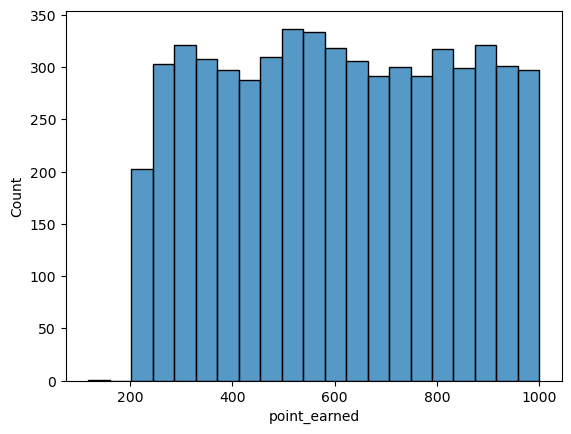

In [13]:
sns.histplot(no_churn_points)

In [14]:
churned=train[train['churn']==1]

In [15]:
churned_points= churned['point_earned']

<AxesSubplot:xlabel='point_earned', ylabel='Count'>

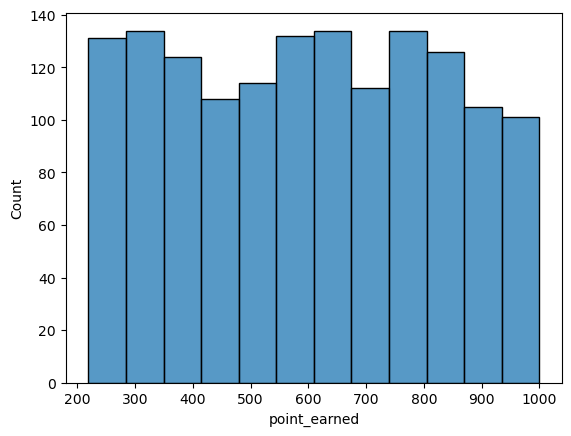

In [16]:
sns.histplot(churned_points)

In [17]:
alpha=0.05

In [18]:
stats.ttest_ind(no_churn_points, churned_points, alternative='greater')

Ttest_indResult(statistic=1.3064811721984397, pvalue=0.09571536013341075)

* the p-value is not lower than the alpha so we do not reject the null hypothesis
* `point_earned` is not a good predictor/driver of churn

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 2:</h2>
    </header>
    <dl>
        <dt>Are customers with lower credit score more likely to churn?</dt>
        <dd>- $H_0$: There is no significant difference in the average credit score of customers that churn and customers that don't.</dd>
        <dd>- $H_a$: The average credit score of customers that have not churned is significantlly higher than the average credit score of customers that have churned.</dd>
    </dl>
</div>

In [19]:
no_churn_cs= no_churn['credit_score']

<AxesSubplot:xlabel='credit_score', ylabel='Count'>

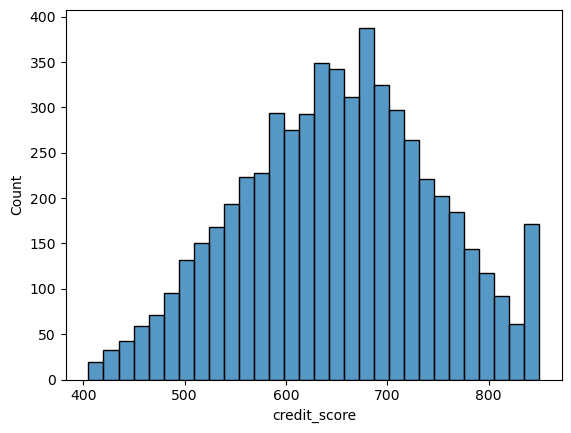

In [20]:
sns.histplot(no_churn_cs)

In [21]:
churn_cs= churned['credit_score']

<AxesSubplot:xlabel='credit_score', ylabel='Count'>

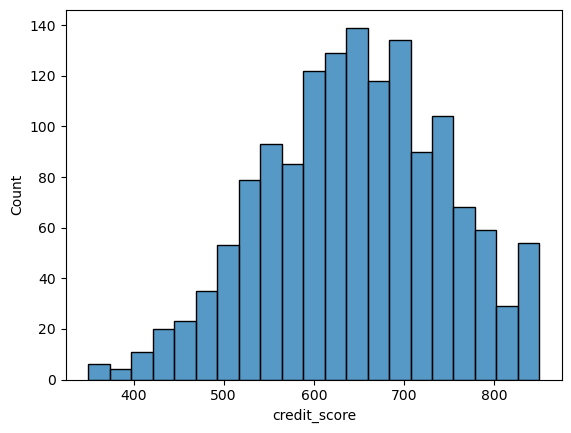

In [22]:
sns.histplot(churn_cs)

In [23]:
stats.ttest_ind(no_churn_cs, churn_cs, alternative='greater')

Ttest_indResult(statistic=1.8632508788985662, pvalue=0.03123383687715922)

In [24]:
no_churn_cs.mean(), churn_cs.mean()

(650.888772845953, 645.5903780068728)

* the p-value is lower than the alpha of 0.05 so we can reject the null hypothesis
* the actual difference in the means is about 5 points on average and in most cases 5 points will not impact an individual in any way
* though is is statistically significant, is is not a driver of customer churn.

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 3:</h2>
    </header>
    <dl>
        <dt>Are customers in a certain country more likely to churn?</dt>
        <dd>- $H_0$: Wether customers will churn or not is not dependent on the geography.</dd>
        <dd>- $H_a$: Wether customers will churn or not is dependent on the geography.</dd>
    </dl>
</div>

In [25]:
train.head()

,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_products,has_cr_card,is_active_member,estimated_salary,churn,complain,satisfaction_score,card_type,point_earned
7142,15654859,Ngozichukwuka,612,Spain,Female,63,2,131629.17,2,1,0,122109.58,1,1,4,SILVER,642
6725,15639552,Mellor,603,Germany,Female,40,8,148897.02,1,0,0,105052.90,0,0,1,DIAMOND,352
8129,15729246,Hardacre,847,Spain,Male,31,5,0.00,2,1,1,76326.67,0,0,4,SILVER,791
5338,15784000,Pope,715,Germany,Female,34,9,102277.52,1,0,0,177852.57,1,1,2,SILVER,338
9866,15632446,Allan,667,France,Male,24,4,0.00,2,0,0,180329.83,0,0,3,SILVER,392


In [26]:
train['geography'].value_counts()

France     3605
Spain      1798
Germany    1797
Name: geography, dtype: int64

In [27]:
france=churned[churned['geography']=='France']
spain=churned[churned['geography']=='Spain']
germany=churned[churned['geography']=='Germany']

In [28]:
france.head()

,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_products,has_cr_card,is_active_member,estimated_salary,churn,complain,satisfaction_score,card_type,point_earned
245,15797219,Ifesinachi,635,France,Female,40,10,123497.58,1,1,0,131953.23,1,1,5,GOLD,774
2439,15586976,Alexeeva,566,France,Female,42,6,0.00,1,1,0,180702.12,1,1,3,GOLD,420
3732,15689598,Dean,722,France,Male,46,6,0.00,1,1,1,93917.68,1,1,3,GOLD,747
1047,15793949,Cheng,726,France,Female,48,4,0.00,1,1,0,114020.06,1,1,2,DIAMOND,283
2518,15759436,Aksenov,758,France,Female,50,2,95813.76,3,1,1,67944.09,1,1,2,PLATINUM,525


In [29]:
france.shape

(573, 17)

In [30]:
# need to run a chi squared

In [31]:
observed = pd.crosstab(train['geography'], train['churn'])
observed

churn,0,1
geography,,
France,3032,573
Germany,1220,577
Spain,1493,305


In [32]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [33]:
print('Observed Values\n')
print(observed.values)
print('---\nExpected Values\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {round(chi2,4)}') 
print(f'p     = {p}')

Observed Values

[[3032  573]
 [1220  577]
 [1493  305]]
---
Expected Values

[[2876  728]
 [1433  363]
 [1434  363]]
---

chi^2 = 211.1817
p     = 1.3882650127300721e-46


* There is a significant difference between the observed and expected values (p-value is less than the alpha)
* There is a significant relationship between country and churn

## Test the significance of each country

In [34]:
train, val, test= ex.tts(df, 'churn')

In [35]:
train['geography'].value_counts()

France     3605
Spain      1798
Germany    1797
Name: geography, dtype: int64

In [36]:
train['geography'].dtype

dtype('O')

In [37]:
train['is_france']=train['geography']

In [38]:
train['is_france']=train['is_france'].astype('string')

In [39]:
train['is_france'].replace('France','1', inplace=True)
train['is_france'].replace('Germany','0', inplace=True)
train['is_france'].replace('Spain','0', inplace=True)

In [40]:
train['is_france']=train['is_france'].astype(int)

In [41]:
train['is_france'].dtype

dtype('int64')

In [42]:
train.head()

,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_products,has_cr_card,is_active_member,estimated_salary,churn,complain,satisfaction_score,card_type,point_earned,is_france
7142,15654859,Ngozichukwuka,612,Spain,Female,63,2,131629.17,2,1,0,122109.58,1,1,4,SILVER,642,0
6725,15639552,Mellor,603,Germany,Female,40,8,148897.02,1,0,0,105052.90,0,0,1,DIAMOND,352,0
8129,15729246,Hardacre,847,Spain,Male,31,5,0.00,2,1,1,76326.67,0,0,4,SILVER,791,0
5338,15784000,Pope,715,Germany,Female,34,9,102277.52,1,0,0,177852.57,1,1,2,SILVER,338,0
9866,15632446,Allan,667,France,Male,24,4,0.00,2,0,0,180329.83,0,0,3,SILVER,392,1


In [43]:
observed = pd.crosstab(train['is_france'], train['churn'])
observed

churn,0,1
is_france,,
0,2713,882
1,3032,573


In [44]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [45]:
print('Observed Values\n')
print(observed.values)
print('---\nExpected Values\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {round(chi2,4)}') 
print(f'p     = {p}')

Observed Values

[[2713  882]
 [3032  573]]
---
Expected Values

[[2868  726]
 [2876  728]]
---

chi^2 = 82.787
p     = 9.138973778253511e-20


* Customers in France are significantly less likely to churn

In [46]:
train['is_germany']=train['geography']
train['is_germany']=train['is_germany'].astype('string')
train['is_germany'].replace('France','0', inplace=True)
train['is_germany'].replace('Germany','1', inplace=True)
train['is_germany'].replace('Spain','0', inplace=True)
train['is_germany']=train['is_germany'].astype(int)

In [47]:
observed = pd.crosstab(train['is_germany'], train['churn'])
observed

churn,0,1
is_germany,,
0,4525,878
1,1220,577


In [48]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [49]:
print('Observed Values\n')
print(observed.values)
print('---\nExpected Values\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {round(chi2,4)}') 
print(f'p     = {p}')

Observed Values

[[4525  878]
 [1220  577]]
---
Expected Values

[[4311 1091]
 [1433  363]]
---

chi^2 = 209.3496
p     = 1.9044228200728024e-47


* Customers in Germany are significantly more likely to churn

In [50]:
train['is_spain']=train['geography']
train['is_spain']=train['is_spain'].astype('string')
train['is_spain'].replace('France','0', inplace=True)
train['is_spain'].replace('Germany','0', inplace=True)
train['is_spain'].replace('Spain','1', inplace=True)
train['is_spain']=train['is_spain'].astype(int)

In [51]:
observed = pd.crosstab(train['is_spain'], train['churn'])
observed

churn,0,1
is_spain,,
0,4252,1150
1,1493,305


In [52]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [53]:
print('Observed Values\n')
print(observed.values)
print('---\nExpected Values\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {round(chi2,4)}') 
print(f'p     = {p}')

Observed Values

[[4252 1150]
 [1493  305]]
---
Expected Values

[[4310 1091]
 [1434  363]]
---

chi^2 = 15.3831
p     = 8.776896908694881e-05


* Customers in Spain are significantly less likely to churn

## Explore Question 3 Conclusion:
* Customers in Spain and France are less likely to churn
* The company should focus on retaining more German customers
* Consider other German banks and see how their service compares to yours
## Next Step:
* Continue exploring German customers in this data set

In [54]:
train.drop(columns=['is_france', 'is_germany', 'is_spain'], inplace=True)

In [55]:
train.head()

,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_products,has_cr_card,is_active_member,estimated_salary,churn,complain,satisfaction_score,card_type,point_earned
7142,15654859,Ngozichukwuka,612,Spain,Female,63,2,131629.17,2,1,0,122109.58,1,1,4,SILVER,642
6725,15639552,Mellor,603,Germany,Female,40,8,148897.02,1,0,0,105052.90,0,0,1,DIAMOND,352
8129,15729246,Hardacre,847,Spain,Male,31,5,0.00,2,1,1,76326.67,0,0,4,SILVER,791
5338,15784000,Pope,715,Germany,Female,34,9,102277.52,1,0,0,177852.57,1,1,2,SILVER,338
9866,15632446,Allan,667,France,Male,24,4,0.00,2,0,0,180329.83,0,0,3,SILVER,392


<div class="alert alert-info">
    <header>
    <h2>Exploration Question 4:</h2>
    </header>
    <dl>
        <dt>Do customers that churn have a significantly lower salary?</dt>
        <dd>- $H_0$: Customers that churn do not have a significanyly lower salary than customers that don't churn.</dd>
        <dd>- $H_a$: Customers that churn have a significantly lower salary than customers that don't churn.</dd>
    </dl>
</div>

In [56]:
churn_salary=churned['estimated_salary']

<AxesSubplot:xlabel='estimated_salary', ylabel='Count'>

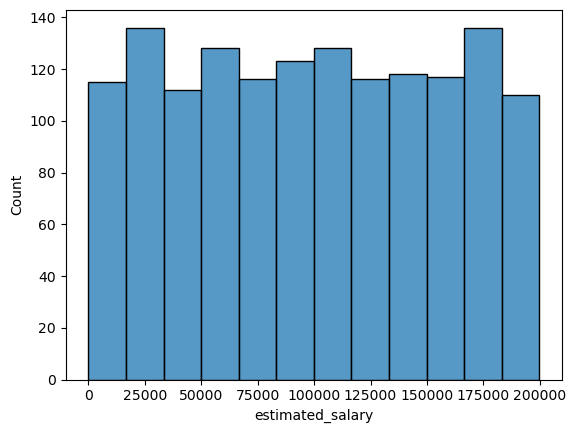

In [57]:
sns.histplot(churn_salary)

In [58]:
no_churn_salary=no_churn['estimated_salary']

<AxesSubplot:xlabel='estimated_salary', ylabel='Count'>

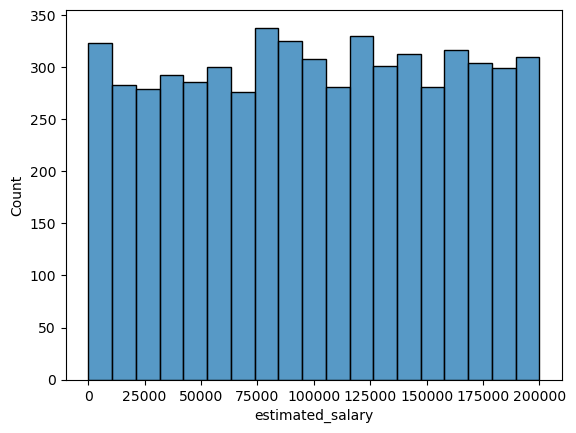

In [59]:
sns.histplot(no_churn_salary)

In [60]:
stats.ttest_ind(churn_salary, no_churn_salary, alternative='greater')

Ttest_indResult(statistic=-0.6893195647456628, pvalue=0.7546777959032747)

* the p-value is not lower than the alpha
* estimated salary is not a significant driver of churn

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 5:</h2>
    </header>
    <dl>
        <dt>Do customers that churn have a significantly higher age?</dt>
        <dd>- $H_0$: Customers that churn do not have a significanyly higher age than customers that don't churn.</dd>
        <dd>- $H_a$: Customers that churn have a significantly higher age than customers that don't churn.</dd>
    </dl>
</div>

In [61]:
churn_age=churned['age']

<AxesSubplot:xlabel='age', ylabel='Count'>

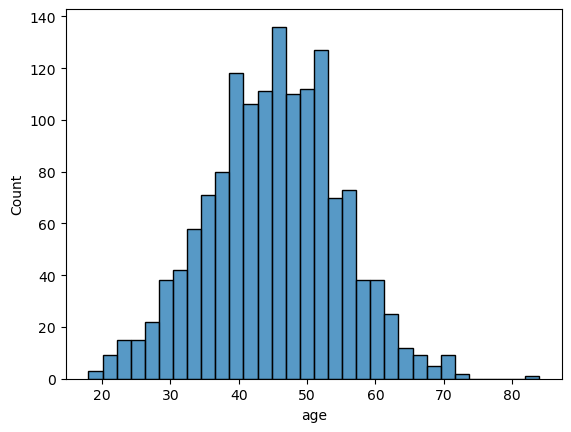

In [62]:
sns.histplot(churn_age)

In [63]:
no_churn_age=no_churn['age']

<AxesSubplot:xlabel='age', ylabel='Count'>

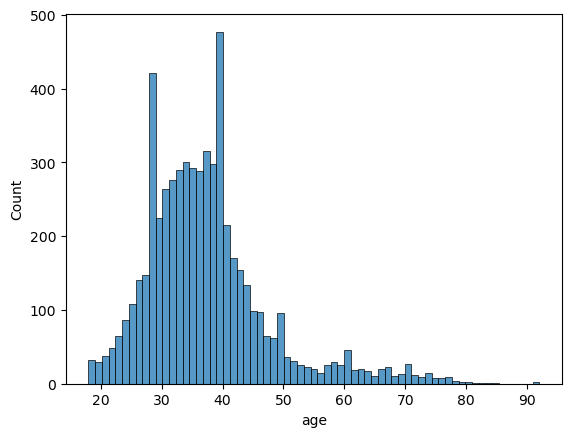

In [64]:
sns.histplot(no_churn_age)

In [65]:
stats.ttest_ind(churn_age, no_churn_age, alternative='greater')

Ttest_indResult(statistic=25.852238983721723, pvalue=2.671774684343541e-141)

In [66]:
def q5_plots(train):
    '''
    This function plots the necessary plots to visualize explore question 5
    '''
    churn_age=train[train['churn']==1]
    no_churn_age=train[train['churn']==0]
    plt.figure(figsize=(10,5))
    plt.subplot(221)
    sns.histplot(x='age', data=churn_age)
    plt.title('Age of Churned Customers')
    plt.xlabel('Age')
    plt.grid(True, alpha=0.3, linestyle='--', axis='y')

    plt.subplot(222)
    sns.histplot(x='age', data=no_churn_age)
    plt.title('Age of Retained Customers')
    plt.xlabel('Age')
    plt.grid(True, alpha=0.3, linestyle='--', axis='y')
    
    plt.figure(figsize=(25,10))
    plt.subplot(223)
    plt.title('Age of Retained and Churned Customers')
    sns.histplot(x='age', data=churn_age, alpha=.5, color='green', label= 'Churned')
    sns.histplot(x='age', data=no_churn_age, alpha=.25, label='Retained')
    plt.xlabel('All Ages of Customers')
    plt.axvline(x=(churn_age['age'].mean()), color='red', label='Churn Mean Age')
    plt.axvline(x=(no_churn_age['age'].mean()), color='yellow', label='Retained Mean Age')
    plt.legend()
    plt.grid(True, alpha=0.3, linestyle='--', axis='y')
    plt.subplots_adjust(left=0.1,
                            bottom=-0.1,
                            right=0.9,
                            top=0.9,
                            wspace=0.4,
                            hspace=0.4)
    plt.show()
    
    churn_age_mean=round(churn_age['age'].mean(),2)
    no_churn_age_mean=round(no_churn_age['age'].mean(),2)
    print(f'The mean age of churned customers is {churn_age_mean}.')
    print(f'The mean age of retained customers is {no_churn_age_mean}.')

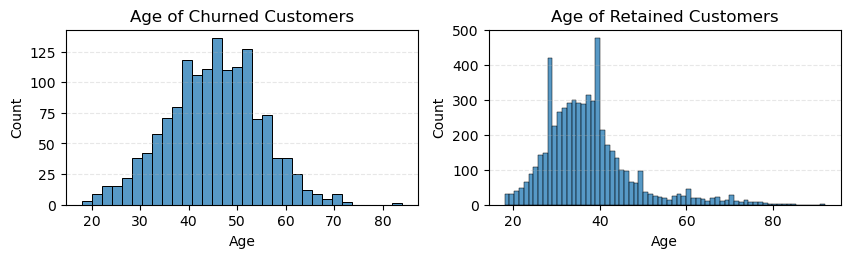

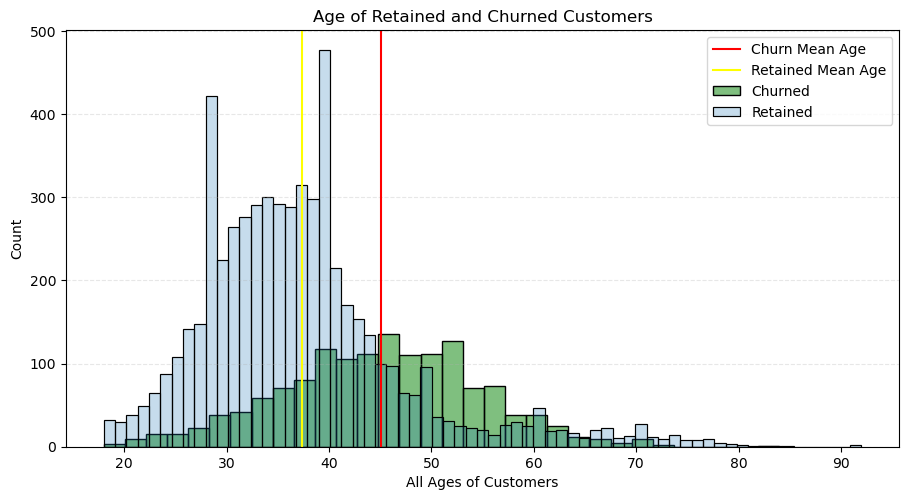

The mean age of churned customers is 45.03.
The mean age of retained customers is 37.37.


In [67]:
q5_plots(train)

* P-value is lower than the alpha so we reject the null hypothesis
* The age of customers that churn is significantly higher than customers that don't churn

In [68]:
train.head()

,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_products,has_cr_card,is_active_member,estimated_salary,churn,complain,satisfaction_score,card_type,point_earned
7142,15654859,Ngozichukwuka,612,Spain,Female,63,2,131629.17,2,1,0,122109.58,1,1,4,SILVER,642
6725,15639552,Mellor,603,Germany,Female,40,8,148897.02,1,0,0,105052.90,0,0,1,DIAMOND,352
8129,15729246,Hardacre,847,Spain,Male,31,5,0.00,2,1,1,76326.67,0,0,4,SILVER,791
5338,15784000,Pope,715,Germany,Female,34,9,102277.52,1,0,0,177852.57,1,1,2,SILVER,338
9866,15632446,Allan,667,France,Male,24,4,0.00,2,0,0,180329.83,0,0,3,SILVER,392


<div class="alert alert-info">
    <header>
    <h2>Exploration Question 6:</h2>
    </header>
    <dl>
        <dt>Are customers with lower balance more likely to churn?</dt>
        <dd>- $H_0$: There is no significant difference in the average balance of customers that churn and customers that don't.</dd>
        <dd>- $H_a$: The average balance of customers that have not churned is significantlly higher than the average balance of customers that have churned.</dd>
    </dl>
</div>

In [69]:
churn_balance=churned['balance']

<AxesSubplot:xlabel='balance', ylabel='Count'>

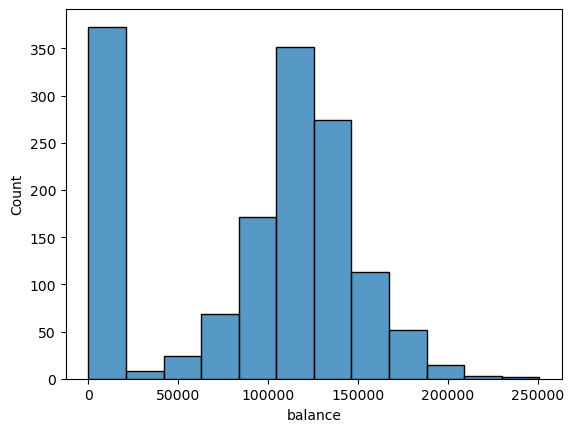

In [70]:
sns.histplot(churn_balance)

In [71]:
churn_balance.mean()

90153.98549828166

In [72]:
no_churn_balance=no_churn['balance']

<AxesSubplot:xlabel='balance', ylabel='Count'>

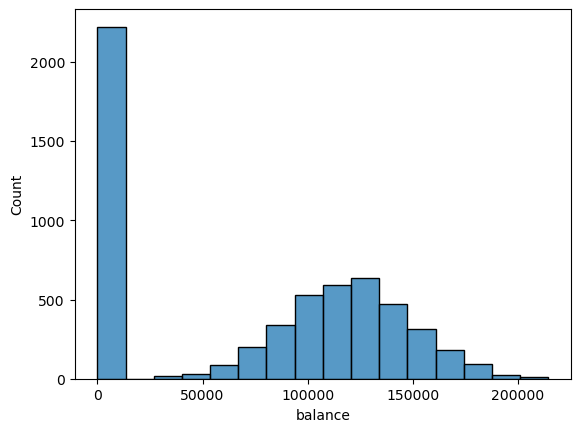

In [73]:
sns.histplot(no_churn_balance)

In [74]:
no_churn_balance.mean()

73204.5325361183

In [75]:
stats.ttest_ind(churn_balance, no_churn_balance, alternative='greater')

Ttest_indResult(statistic=9.33257861767509, pvalue=6.7497398683989695e-21)

* the p value is lower than the alpha so we can reject the null hypothesis
* the results are opposite of what I thought for this question. The higher the balance in these accounts, the more likely the customer is to churn.
* the difference in the average balance for customers that churn and don't churn is around 17k

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 7:</h2>
    </header>
    <dl>
        <dt>Are customers with lower balance in Germany more likely to churn?</dt>
        <dd>- $H_0$: There is no significant difference in the average balance of customers in Germany that have churned compared to all customers average balance that have churned.</dd>
        <dd>- $H_a$: The average balance of customers in Germany that have churned is significantlly higher than the average balance of all customers that have churned.</dd>
    </dl>
</div>

In [76]:
churn_balance_germany = churned[churned['geography']=='Germany']['balance']

In [77]:
churn_balance_germany.head()

5338    102277.52
5290     94348.94
3294    127631.62
7068    111009.32
6496     96553.52
Name: balance, dtype: float64

<AxesSubplot:xlabel='balance', ylabel='Count'>

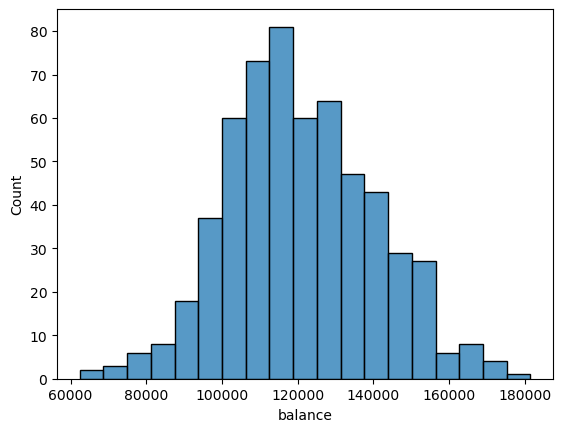

In [78]:
sns.histplot(churn_balance_germany)

In [79]:
churn_balance= churned['balance']

<AxesSubplot:xlabel='balance', ylabel='Count'>

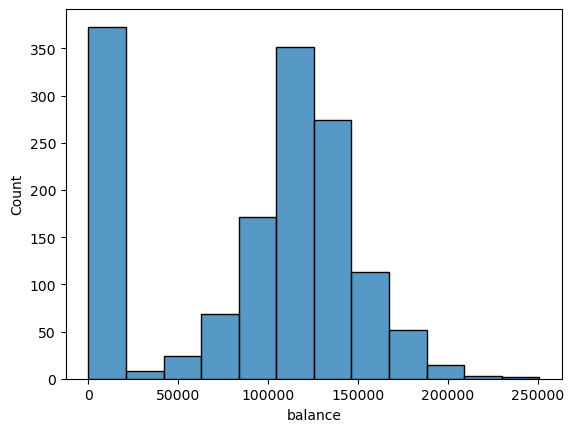

In [80]:
sns.histplot(churn_balance)

In [81]:
churn_mean_balance=churn_balance.mean()

In [82]:
stats.ttest_1samp(churn_balance_germany, churn_mean_balance, alternative='greater')

Ttest_1sampResult(statistic=37.6365602233125, pvalue=1.1710687406377856e-157)

* the p-value is lower than the alpha so we reject the null hypothesis
* customers in Germany that have churned have a significantly higher balance compared to all customers that have churned

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 8:</h2>
    </header>
    <dl>
        <dt>Are customers with lower balance in France or Spain more likely to churn?</dt>
        <dd>- $H_0$: There is no significant difference in the average balance of customers in France or Spain that have churned compared to all customers average balance that have churned.</dd>
        <dd>- $H_a$: The average balance of customers in France or Spain that have churned is significantlly lower than the average balance of all customers that have churned.</dd>
    </dl>
</div>

In [83]:
churn_balance_france = churned[churned['geography']=='France']['balance']
churn_balance_spain = churned[churned['geography']=='Spain']['balance']

<AxesSubplot:xlabel='balance', ylabel='Count'>

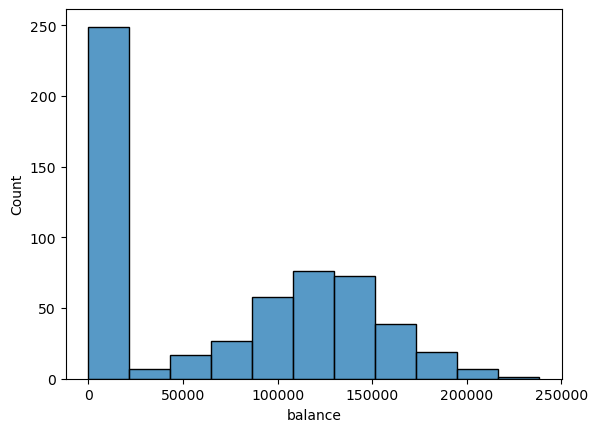

In [84]:
sns.histplot(churn_balance_france)

<AxesSubplot:xlabel='balance', ylabel='Count'>

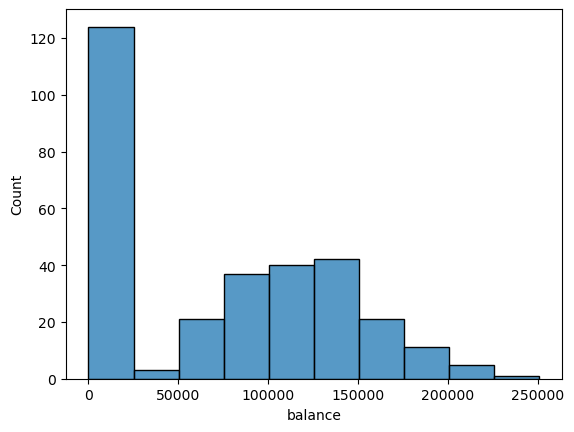

In [85]:
sns.histplot(churn_balance_spain)

In [86]:
stats.ttest_1samp(churn_balance_france, churn_mean_balance, alternative='less')

Ttest_1sampResult(statistic=-7.492385229461022, pvalue=1.291149407028778e-13)

In [87]:
stats.ttest_1samp(churn_balance_spain, churn_mean_balance, alternative='less')

Ttest_1sampResult(statistic=-4.811545964697727, pvalue=1.181096800139958e-06)

* The p-values for France and Spain are lower than the alpha
* Customers from France and Spain that churn have a significantly lower balance than the average of all churning customers

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 9:</h2>
    </header>
    <dl>
        <dt>Are customers from Germany have more complaints?</dt>
        <dd>- $H_0$: There is no significant difference in the complaints of German customers and other customers.</dd>
        <dd>- $H_a$: The German customers complain significantly more than French and Spanish customers.</dd>
    </dl>
</div>

In [88]:
train['is_germany']=train['geography']
train['is_germany']=train['is_germany'].astype('string')
train['is_germany'].replace('France','0', inplace=True)
train['is_germany'].replace('Germany','1', inplace=True)
train['is_germany'].replace('Spain','0', inplace=True)
train['is_germany']=train['is_germany'].astype(int)

In [89]:
observed = pd.crosstab(train['is_germany'], train['complain'])
observed

complain,0,1
is_germany,,
0,4524,879
1,1214,583


In [90]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [91]:
print('Observed Values\n')
print(observed.values)
print('---\nExpected Values\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {round(chi2,4)}') 
print(f'p     = {p}')

Observed Values

[[4524  879]
 [1214  583]]
---
Expected Values

[[4305 1097]
 [1432  364]]
---

chi^2 = 217.0006
p     = 4.079932895889293e-49


* the p-value is lower than the alpha so we reject the null hypothesis
* German customers have significantly more complaints than other countries
* The Company may retain more customers from Germany if they focus thir complaints and try to remedy them

## France

In [92]:
train['is_france']=train['geography']
train['is_france']=train['is_france'].astype('string')
train['is_france'].replace('France','1', inplace=True)
train['is_france'].replace('Germany','0', inplace=True)
train['is_france'].replace('Spain','0', inplace=True)
train['is_france']=train['is_france'].astype(int)

In [93]:
observed = pd.crosstab(train['is_france'], train['complain'])
observed

complain,0,1
is_france,,
0,2706,889
1,3032,573


In [94]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [95]:
print('Observed Values\n')
print(observed.values)
print('---\nExpected Values\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {round(chi2,4)}') 
print(f'p     = {p}')

Observed Values

[[2706  889]
 [3032  573]]
---
Expected Values

[[2865  729]
 [2872  732]]
---

chi^2 = 86.2636
p     = 1.5747934900140974e-20


* We see a significantly less number of complaints from French customers

## Spain

In [96]:
train['is_spain']=train['geography']
train['is_spain']=train['is_spain'].astype('string')
train['is_spain'].replace('France','0', inplace=True)
train['is_spain'].replace('Germany','0', inplace=True)
train['is_spain'].replace('Spain','1', inplace=True)
train['is_spain']=train['is_spain'].astype(int)

In [97]:
observed = pd.crosstab(train['is_france'], train['complain'])
observed

complain,0,1
is_france,,
0,2706,889
1,3032,573


In [98]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [99]:
print('Observed Values\n')
print(observed.values)
print('---\nExpected Values\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {round(chi2,4)}') 
print(f'p     = {p}')

Observed Values

[[2706  889]
 [3032  573]]
---
Expected Values

[[2865  729]
 [2872  732]]
---

chi^2 = 86.2636
p     = 1.5747934900140974e-20


* we see a significantly less than expected number of complaints from Spanish customers

In [100]:
train.head()

,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_products,has_cr_card,is_active_member,estimated_salary,churn,complain,satisfaction_score,card_type,point_earned,is_germany,is_france,is_spain
7142,15654859,Ngozichukwuka,612,Spain,Female,63,2,131629.17,2,1,0,122109.58,1,1,4,SILVER,642,0,0,1
6725,15639552,Mellor,603,Germany,Female,40,8,148897.02,1,0,0,105052.90,0,0,1,DIAMOND,352,1,0,0
8129,15729246,Hardacre,847,Spain,Male,31,5,0.00,2,1,1,76326.67,0,0,4,SILVER,791,0,0,1
5338,15784000,Pope,715,Germany,Female,34,9,102277.52,1,0,0,177852.57,1,1,2,SILVER,338,1,0,0
9866,15632446,Allan,667,France,Male,24,4,0.00,2,0,0,180329.83,0,0,3,SILVER,392,0,1,0


<div class="alert alert-info">
    <header>
    <h2>Exploration Question 10:</h2>
    </header>
    <dl>
        <dt>Does gender affect churn?</dt>
        <dd>- $H_0$: There is no significant difference in the gender of customers and churn.</dd>
        <dd>- $H_a$: Male customers churn significantly more than female customers.</dd>
    </dl>
</div>

In [101]:
observed = pd.crosstab(train['gender'], train['churn'])
observed

churn,0,1
gender,,
Female,2469,817
Male,3276,638


In [102]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [103]:
print('Observed Values\n')
print(observed.values)
print('---\nExpected Values\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {round(chi2,4)}') 
print(f'p     = {p}')

Observed Values

[[2469  817]
 [3276  638]]
---
Expected Values

[[2621  664]
 [3123  790]]
---

chi^2 = 80.6928
p     = 2.6368377813714005e-19


* Female customers churn significantly more than expected
* Male customers churn significantly less than expected

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 11:</h2>
    </header>
    <dl>
        <dt>Do customers with a lower tenure churn more often?</dt>
        <dd>- $H_0$: There is no significant difference in the tenure of customers that churn and don't churn.</dd>
        <dd>- $H_a$: Customers that churn have significantly lower tenure than customers that don't churn.</dd>
    </dl>
</div>

In [104]:
churn_tenure=churned['tenure']

<AxesSubplot:xlabel='tenure', ylabel='Count'>

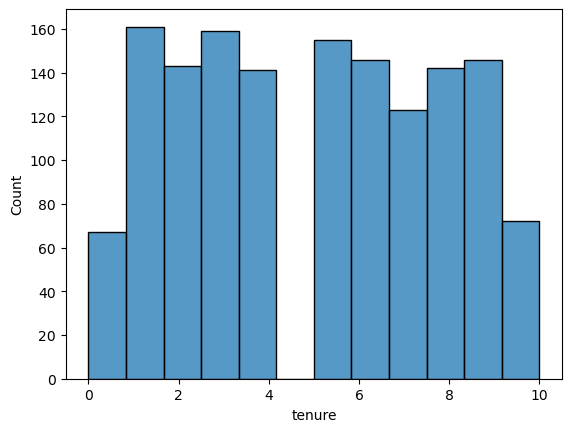

In [105]:
sns.histplot(churn_tenure)

In [106]:
no_churn_tenure=no_churn['tenure']

<AxesSubplot:xlabel='tenure', ylabel='Count'>

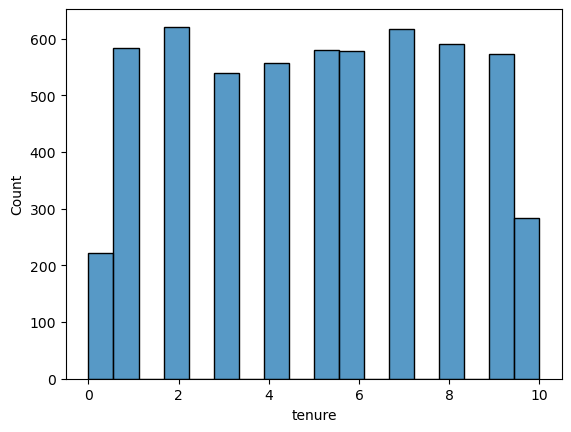

In [107]:
sns.histplot(no_churn_tenure)

In [108]:
stats.ttest_ind(churn_tenure, no_churn_tenure, alternative='less')

Ttest_indResult(statistic=-1.564940971935476, pvalue=0.05882035503317464)

* Though the p-value is very close to the alpha, tenure does not appear to be a significant driver of churn

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 12:</h2>
    </header>
    <dl>
        <dt>Do customers different card types churn more often?</dt>
        <dd>- $H_0$: There is no significant difference in the card type of customers that churn and don't churn.</dd>
        <dd>- $H_a$: Customers that have silver and gold card types churn significantly more than diamond and platinum.</dd>
    </dl>
</div>

In [109]:
train['card_type'].dtype

dtype('O')

In [111]:
train['card_type'].value_counts()

PLATINUM    1830
GOLD        1816
DIAMOND     1785
SILVER      1769
Name: card_type, dtype: int64

## Silver

In [113]:
train['is_silver']=train['card_type']
train['is_silver']=train['is_silver'].astype('string')
train['is_silver'].replace('SILVER','1', inplace=True)
train['is_silver'].replace('DIAMOND','0', inplace=True)
train['is_silver'].replace('GOLD','0', inplace=True)
train['is_silver'].replace('PLATINUM','0', inplace=True)
train['is_silver']=train['is_silver'].astype(int)

In [125]:
def chi2(cross1, cross2):
    observed = pd.crosstab(cross1, cross2)
    chi2, p, degf, expected = stats.chi2_contingency(observed)
    print('Observed Values\n')
    print(observed.values)
    print('---\nExpected Values\n')
    print(expected.astype(int))
    print('---\n')
    print(f'chi^2 = {round(chi2,4)}') 
    print(f'p     = {p}')
    return observed

In [114]:
observed = pd.crosstab(train['is_silver'], train['churn'])
observed

churn,0,1
is_silver,,
0,4316,1115
1,1429,340


In [119]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [120]:
print('Observed Values\n')
print(observed.values)
print('---\nExpected Values\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {round(chi2,4)}') 
print(f'p     = {p}')

Observed Values

[[4316 1115]
 [1429  340]]
---
Expected Values

[[4333 1097]
 [1411  357]]
---

chi^2 = 1.3409
p     = 0.2468792058135117


In [126]:
chi2(train['is_silver'], train['churn'])

Observed Values

[[4316 1115]
 [1429  340]]
---
Expected Values

[[4333 1097]
 [1411  357]]
---

chi^2 = 1.3409
p     = 0.2468792058135117


churn,0,1
is_silver,,
0,4316,1115
1,1429,340


* silver customers do not churn significantly more

## Gold

In [127]:
train['is_gold']=train['card_type']
train['is_gold']=train['is_gold'].astype('string')
train['is_gold'].replace('SILVER','0', inplace=True)
train['is_gold'].replace('DIAMOND','0', inplace=True)
train['is_gold'].replace('GOLD','1', inplace=True)
train['is_gold'].replace('PLATINUM','0', inplace=True)
train['is_gold']=train['is_gold'].astype(int)

In [128]:
chi2(train['is_gold'], train['churn'])

Observed Values

[[4272 1112]
 [1473  343]]
---
Expected Values

[[4295 1088]
 [1449  366]]
---

chi^2 = 2.5185
p     = 0.112517114041269


churn,0,1
is_gold,,
0,4272,1112
1,1473,343


* gold customers do not churn significantly more

## Diamond